<a href="https://colab.research.google.com/github/zaidafreedi/Netflix-EDA-Project/blob/main/netflix_eda_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required packages

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as po

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Accessing data from csv file in the form of Data Frame

In [10]:
df = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')

**Overview of Data Frame**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Preprocessing


1. Converting date_added to date format
2. Cleaning cast by replacing with Unknown
3. Cleaning directors by replacing with unknown
4. Cleaning country by replacing with unkonwn
5. Filling date_added with median data
6. Splitting cast to list of values into a new column actors
7. Splitting listed_in to a list of values into a new column genre
8. Splitting director to a list of values
9. Dropping further nan value data




This approximately gives a total of 8800 rows by eliminating 7 rows from the actual data

In [14]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [15]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [16]:
df['cast'].fillna('Unknown',inplace=True)

In [17]:
df['director'].fillna('Unknown', inplace=True)

In [18]:
df['country'].fillna('Unknown', inplace=True)

In [19]:
df['date_added'].fillna(df['date_added'].median(), inplace=True)


In [20]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [21]:
df['actors'] = df['cast'].apply(lambda x: x.split(', '))
df.drop(columns='cast', inplace=True)

In [22]:
df['genre']=df['listed_in'].str.split(', ')
df.drop(columns='listed_in',inplace=True)

In [23]:
df['director']=df['director'].str.split(', ')

In [24]:
df.dropna(inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8800 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8800 non-null   object        
 1   type          8800 non-null   object        
 2   title         8800 non-null   object        
 3   director      8800 non-null   object        
 4   country       8800 non-null   object        
 5   date_added    8800 non-null   datetime64[ns]
 6   release_year  8800 non-null   int64         
 7   rating        8800 non-null   object        
 8   duration      8800 non-null   object        
 9   description   8800 non-null   object        
 10  actors        8800 non-null   object        
 11  genre         8800 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 893.8+ KB


In [26]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,description,actors,genre
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",[Unknown],[Documentaries]
1,s2,TV Show,Blood & Water,[Unknown],South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...","[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...","[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,[Julien Leclercq],Unknown,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...","[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,[Unknown],Unknown,2021-09-24,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",[Unknown],"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,[Unknown],India,2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...","[International TV Shows, Romantic TV Shows, TV..."


# Analysis of Content type on Netflix

In [27]:
netflix_shows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

Text(0, 0.5, '')

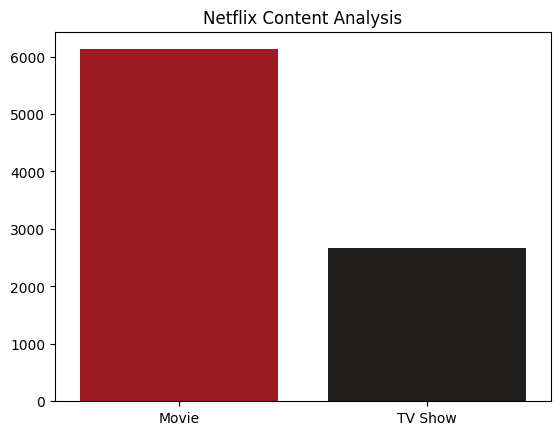

In [28]:
custom_palette = ['#221f1f' if count < max(df['type'].value_counts()) else '#b20710' for count in df['type'].value_counts()]
mt=sns.countplot(x='type',data=df,palette=custom_palette)
mt.set_title('Netflix Content Analysis')
mt.set_xlabel('')
mt.set_ylabel('')

In [29]:
grouped = df["type"].value_counts().reset_index()
grouped = grouped.rename(columns = {'type' : "count", "index" : 'type'})

## Plot
trace = po.graph_objects.Pie(labels=grouped['type'], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#b20710", "#221f1f"]))
layout = po.graph_objects.Layout(title="", height=700, legend=dict(x=0.1, y=1.1))
fig = po.graph_objects.Figure(data = [trace], layout = layout)
po.offline.iplot(fig)

>Insights

---
There is a Greater Number of Movies Available than TV Shows on Netflix

# Optimal Content Release Strategy

1. Comparative Analysis of Release Years and Timeline of Netflix Additions
2. Analysis of Monthly Additions of TV Shows and Movies on Netflix
3. Comparative Monthly Trends in Movie and TV Show Additions to Netflix (2018-2020)


**Comparative Analysis of Release Years and Timeline of Netflix Additions**

In [30]:
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

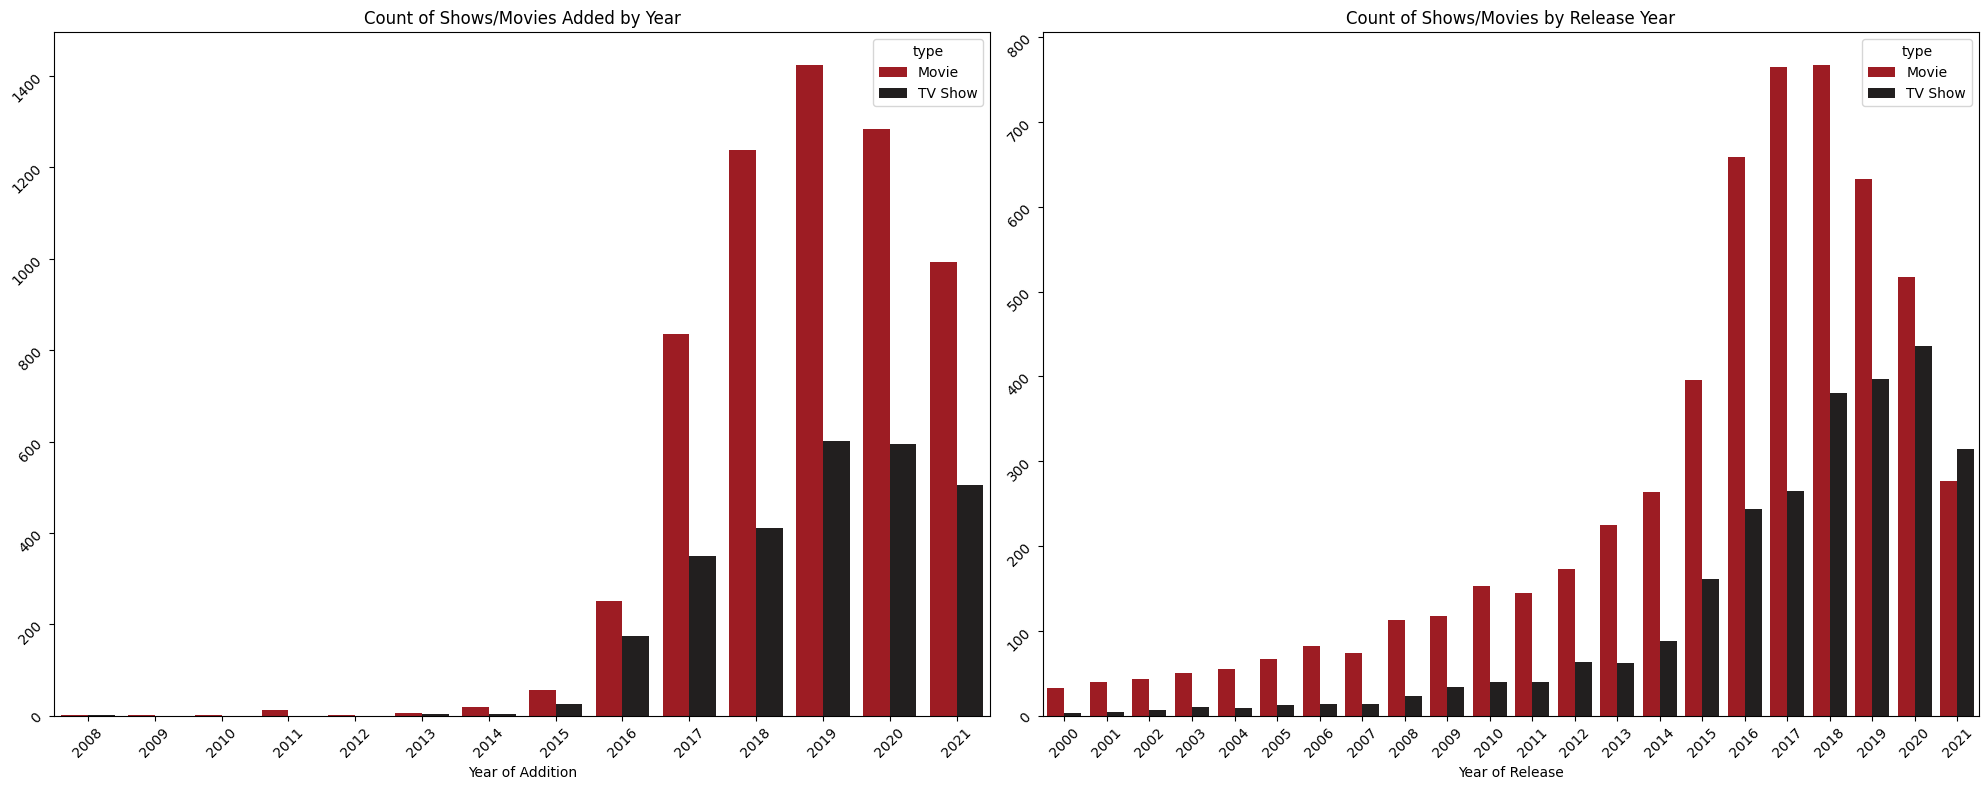

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=df, x='year_added', hue='type',palette=["#b20710", "#221f1f"], ax=axes[0])
axes[0].set_title('Count of Shows/Movies Added by Year')
axes[0].set_xlabel('Year of Addition')
axes[0].set_ylabel('')
axes[0].tick_params(rotation=45)

sns.countplot(data=df[df['release_year']>=2000], x='release_year', hue='type', palette=["#b20710", "#221f1f"], ax=axes[1])
axes[1].set_title('Count of Shows/Movies by Release Year')
axes[1].set_xlabel('Year of Release')
axes[1].set_ylabel('')
axes[1].tick_params(rotation=45)

plt.tight_layout()
plt.show()

**Analysis of Monthly Additions of TV Shows and Movies on Netflix**

In [32]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

ma=df[df['type']=='Movie'].groupby(['year_added'])['month_name_added'].value_counts().unstack()[month_order].T
tva=df[df['type']=='TV Show'].groupby(['year_added'])['month_name_added'].value_counts().unstack()[month_order].T

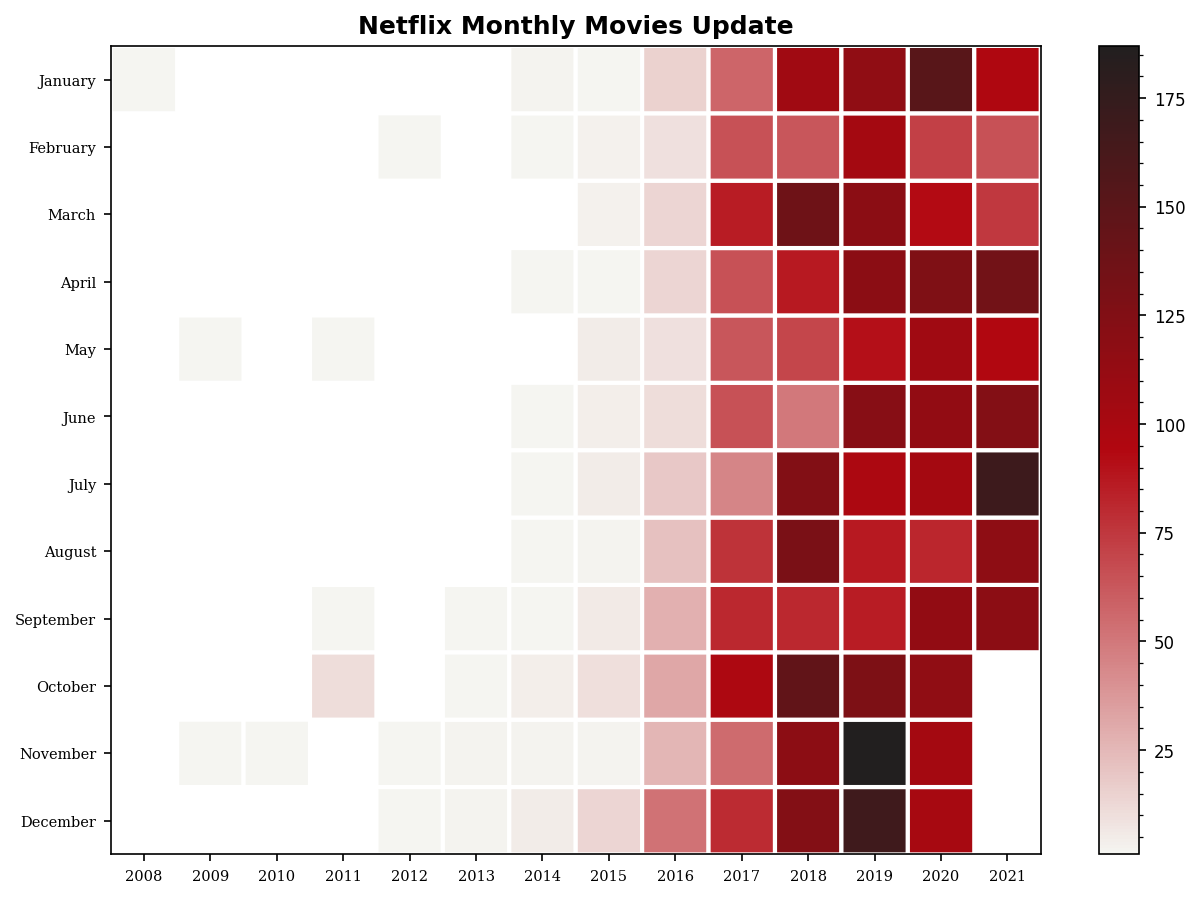

In [33]:
from matplotlib.colors import LinearSegmentedColormap
#heatmap "Movies"
plt.figure(figsize=(10, 7), dpi=150)
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ['#f5f5f1',"#b20710", "#221f1f"])

plt.pcolor(ma, cmap=custom_cmap, edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(ma.columns), 1), ma.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(ma.index), 1), ma.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Monthly Movies Update', fontsize=12, fontfamily='DejaVu Sans', fontweight='bold', position=(0.5, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

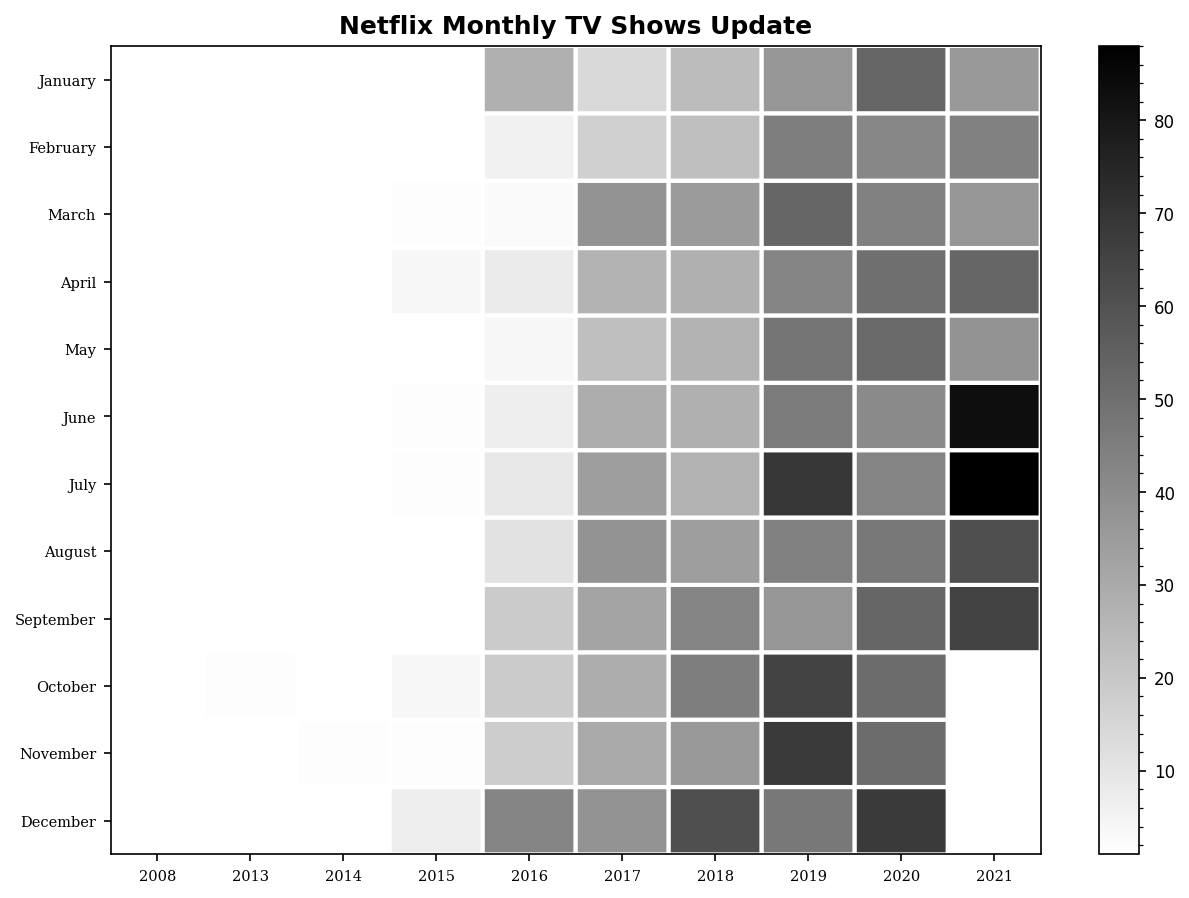

In [34]:
#heatmap "TV Shows"
plt.figure(figsize=(10, 7), dpi=150)
plt.pcolor(tva, cmap='gray_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(tva.columns), 1), tva.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(tva.index), 1), tva.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Monthly TV Shows Update', fontsize=12, fontfamily='DejaVu Sans', fontweight='bold', position=(0.5, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

**Comparative Monthly Trends in Movie and TV Show Additions to Netflix (2018-2020)**

In [35]:
sma=ma.iloc[:,-4:-1].sum(axis=1,skipna=True)
stva=tva.iloc[:,-4:-1].sum(axis=1,skipna=True)
comb_anl = pd.concat([sma, stva], axis=1,keys=['Movies','TV Shows'])
comb_anl=comb_anl.reindex(index=comb_anl.index[::-1])
print(comb_anl)


                  Movies  TV Shows
month_name_added                  
January            373.0     114.0
February           238.0     110.0
March              350.0     132.0
April              333.0     121.0
May                266.0     127.0
June               287.0     115.0
July               326.0     139.0
August             299.0     125.0
September          282.0     133.0
October            390.0     161.0
November           408.0     155.0
December           393.0     176.0


>Insights

---
* A considerable increase in the addition of movies and TV shows to Netflix commenced post-2011 .
* Although the trend of content additions on Netflix is more oriented towards movies due to the cumulatively large number of movies available.
* Furthermore, there is a noticeable trend of an increasing number of TV shows being released in recent years, surpassing the quantity of movies being released. This may lead to a shift in the content addition trends towards TV shows.
* December consistently exhibits the highest number of additions for both movies and TV shows across multiple years. Conversely, February typically records the lowest count of content additions.

# Analysis of Ratings in Netflix

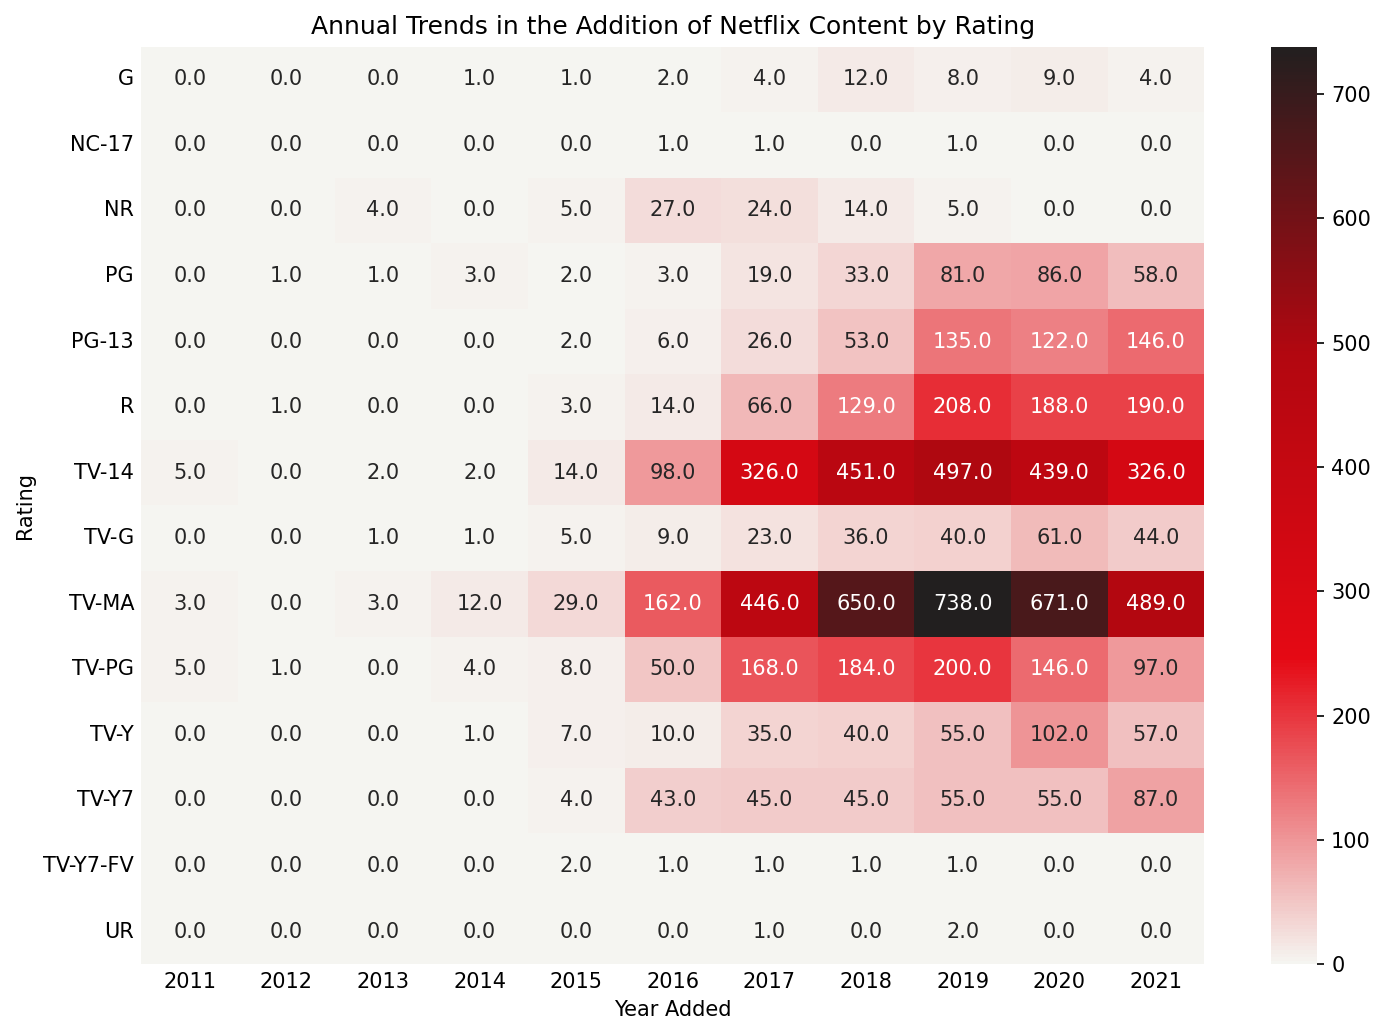

In [36]:
ra=df[df['year_added']>=2011].pivot_table(index='year_added', columns='rating',values='type', aggfunc='count', fill_value=0)
ra=ra.T

cusmap = LinearSegmentedColormap.from_list("cusmap", ['#f5f5f1','#e50914','#b20710','#221f1f'])
plt.figure(figsize=(10, 7), dpi=150)
sns.heatmap(ra, annot=True, cmap=cusmap,fmt='.1f')

plt.title("Annual Trends in the Addition of Netflix Content by Rating")
plt.ylabel('Rating')
plt.xlabel('Year Added')
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

Text(0, 0.5, '')

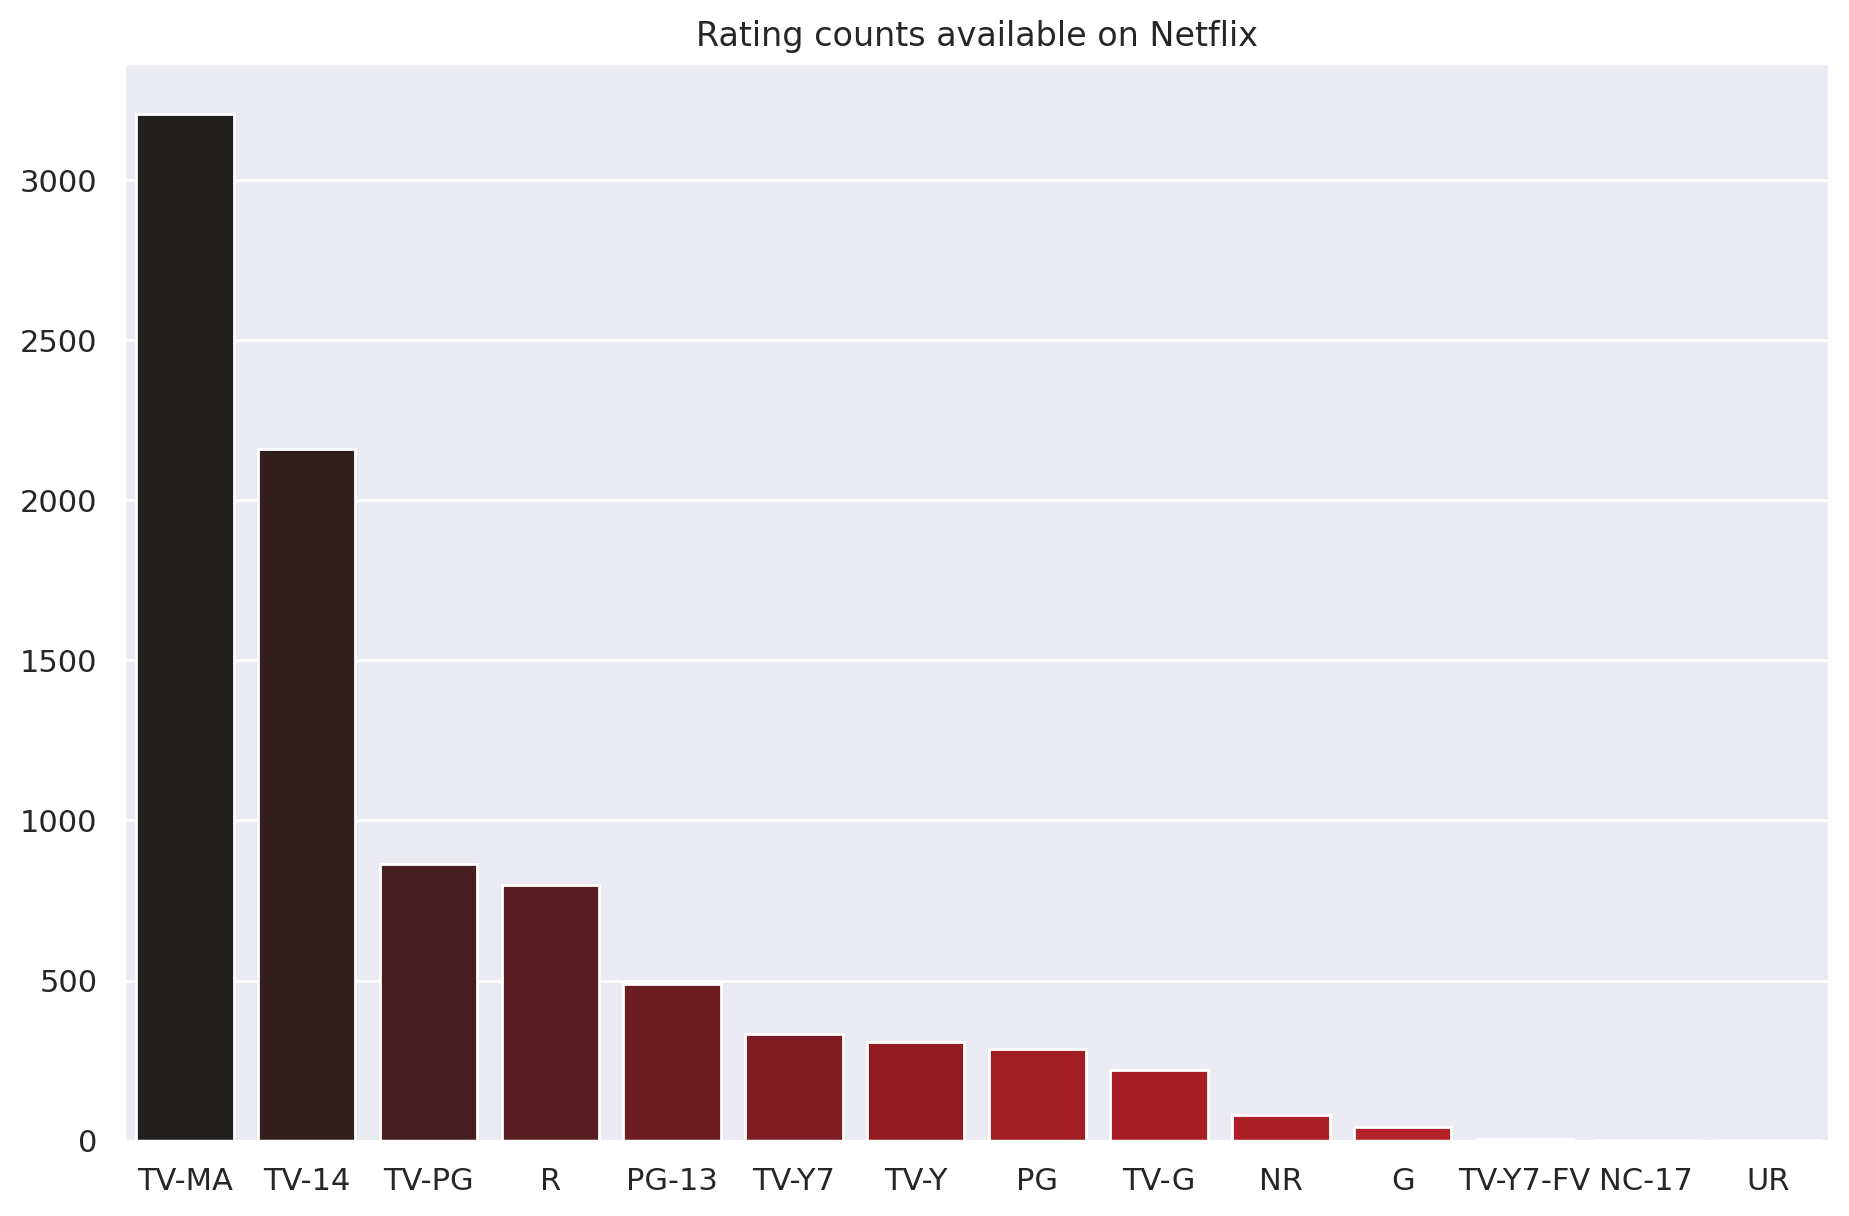

In [37]:
plt.figure(figsize=(11, 7), dpi=200)
cusmap = LinearSegmentedColormap.from_list("cusmap", ['#221f1f','#b20710','#e50914'])
cmap = plt.get_cmap(cusmap, 14)
shades = [cmap(i) for i in np.linspace(0, 1, 14)]
fshades=['#%02X%02X%02X' % (int(r*255), int(g*255), int(b*255)) for r, g, b, _ in shades]

sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette=fshades, order=df['rating'].value_counts().index[0:15])
ax.set_title('Rating counts available on Netflix')
ax.set_xlabel('')
ax.set_ylabel('')



>Insights

---
Netflix's strategic focus on adding a substantial number of TV-MA and TV-14 rated content, followed by R-rated content, is driven by the aim to cater to diverse viewer demographics and tastes. This approach allows Netflix to maintain a competitive edge by aligning with audience preferences and maximizing its reach across various age groups.

# Country-Wise Analysis

1. Top 10 Countries Ranked by the Quantity of Content Available on Netflix
2. Analysis of Content Types from the Leading Countries Available on Netflix
3. Analysis of Content Type Trends released in Leading Countries
3. Target Audience Analysis by Country

**Top 10 Countries Ranked by the Quantity of Content Available on Netflix**

In [38]:
#Creating New rows for Moveis/TV Shows with multiple countries

new_lis=[]
for index,row in df.iterrows():
    cons=row['country'].split(', ')

    for con in cons:
        new_d=row.copy()
        new_d['country']=con
        new_lis.append(new_d)
udf=pd.DataFrame(new_lis)
udf.reset_index(inplace=True,drop=True)

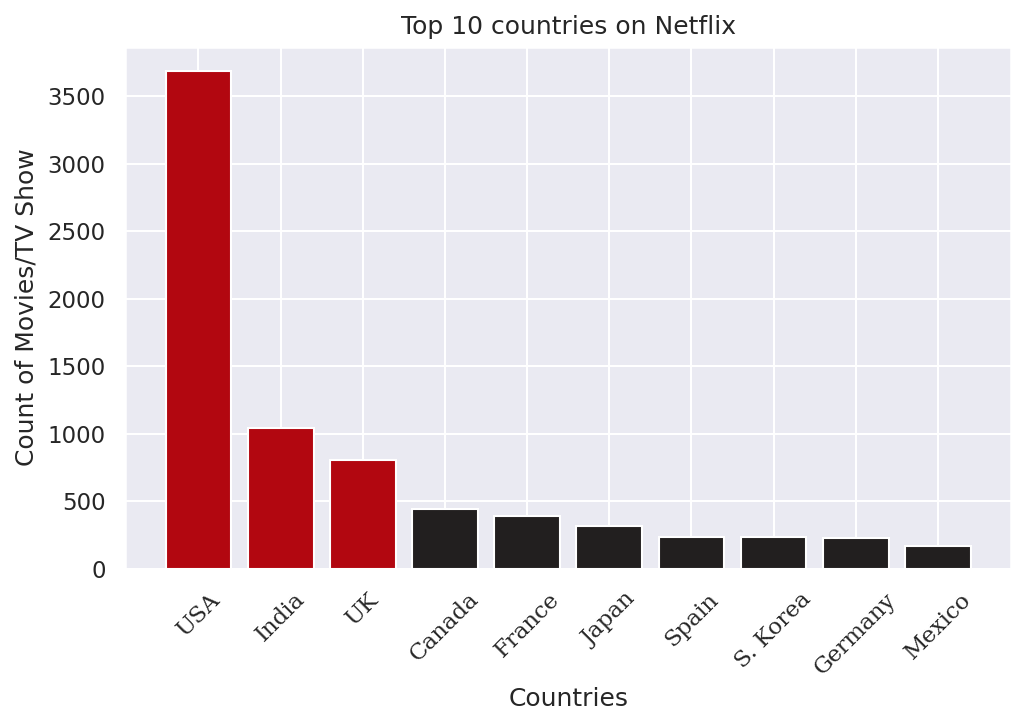

In [39]:
data = udf.groupby('country').size().sort_values(ascending=False)[:11]
data.drop('Unknown',inplace=True)
topcon=list(data.index)

data=data.rename(index={'United States':'USA'})
data=data.rename(index={'South Korea':'S. Korea'})
data=data.rename(index={'United Kingdom':'UK'})

color_map = ["#221f1f" for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710'

plt.figure(figsize=(7, 5), dpi=150)
plt.bar(data.index, data.values, color=color_map)

plt.xlabel('Countries')
plt.ylabel('Count of Movies/TV Show')
plt.title('Top 10 countries on Netflix')

plt.xticks(data.index, fontfamily='serif', rotation=45)


plt.tight_layout()
plt.show()

**Analysis of Content Types from the Leading Countries Available on Netflix**

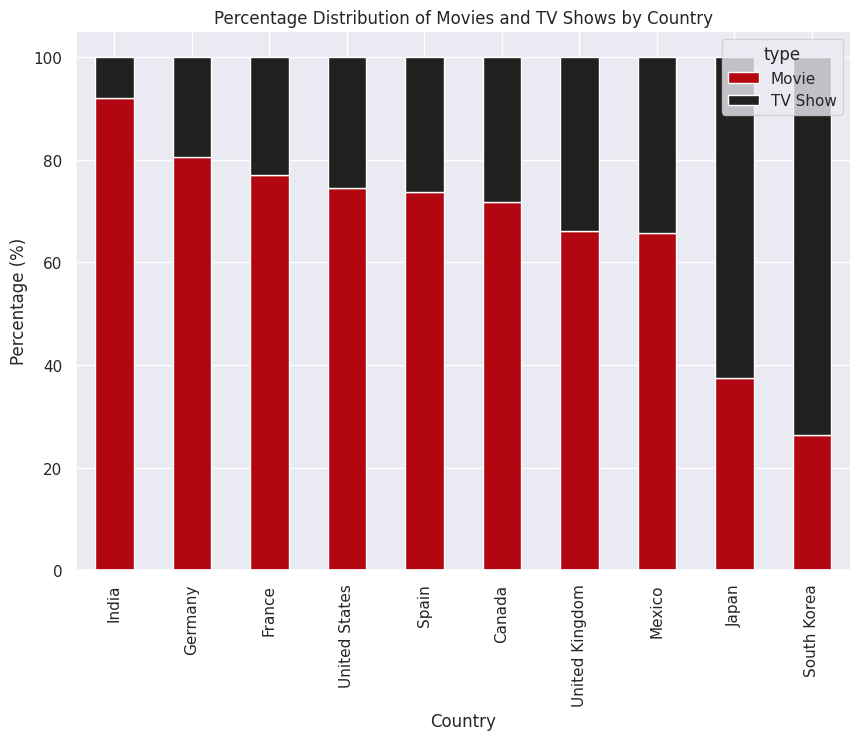

In [40]:
ct=udf[udf['country'].isin(topcon)].groupby('country')['type'].value_counts()
ct = ct.unstack(level='type')

# Calculate the percentages
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Sort the percentages within each type
ct_percent.sort_values(by='Movie',ascending=False,inplace=True)

# Create a stacked bar plot
ax = ct_percent.plot(kind='bar', stacked=True, figsize=(10, 7),color=["#b20710", "#221f1f"])
ax.set_xlabel('Country')
ax.set_ylabel('Percentage (%)')
ax.set_title('Percentage Distribution of Movies and TV Shows by Country')

# Show the plot
plt.show()

**Analysis of Content Trends in Leading Countries**

In [41]:
tv_cnt=udf[(udf['type']=='TV Show')&(udf['release_year']>=2015)].copy()
tv_cnt=tv_cnt[tv_cnt['country'].isin(topcon)].pivot_table(index='country',columns='release_year',values='type',aggfunc='count',fill_value=0)
tv_cnt

release_year,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,
Canada,8,16,12,18,17,17,8
France,7,8,9,14,17,13,4
Germany,2,3,5,3,3,19,5
India,10,1,3,13,14,17,10
Japan,11,13,21,33,24,15,12
Mexico,1,6,3,9,11,12,8
South Korea,11,28,23,20,20,26,14
Spain,1,3,7,10,11,14,10
United Kingdom,22,31,38,36,28,35,22


In [42]:
m_cnt=udf[(udf['type']=='Movie')&(udf['release_year']>=2015)].copy()
m_cnt=m_cnt[m_cnt['country'].isin(topcon)].pivot_table(index='country',columns='release_year',values='type',aggfunc='count',fill_value=0)
m_cnt

release_year,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,
Canada,28,41,46,49,27,22,4
France,26,44,31,33,32,13,9
Germany,12,27,17,11,11,14,4
India,60,79,108,88,79,60,25
Japan,5,12,16,16,12,9,3
Mexico,8,17,17,16,14,11,5
South Korea,5,8,10,14,7,5,6
Spain,15,28,26,36,21,17,6
United Kingdom,44,71,63,60,40,32,14


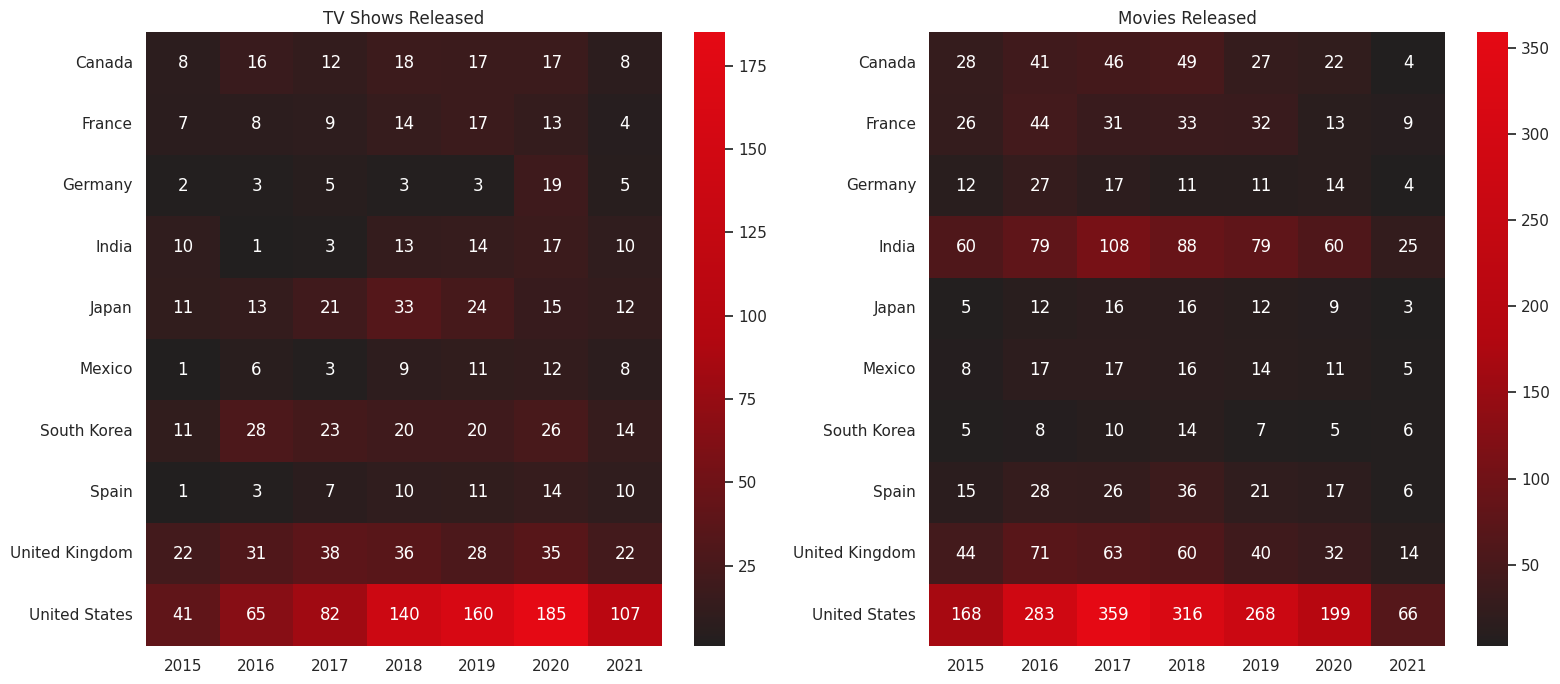

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot the first heatmap with annotations
sns.heatmap(tv_cnt, annot=True, fmt='d', cmap=cusmap, ax=axes[0])
axes[0].set_title('TV Shows Released')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Plot the second heatmap with annotations
sns.heatmap(m_cnt, annot=True, fmt='d', cmap=cusmap, ax=axes[1])
axes[1].set_title('Movies Released')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


**Target Audience Analysis by Country**

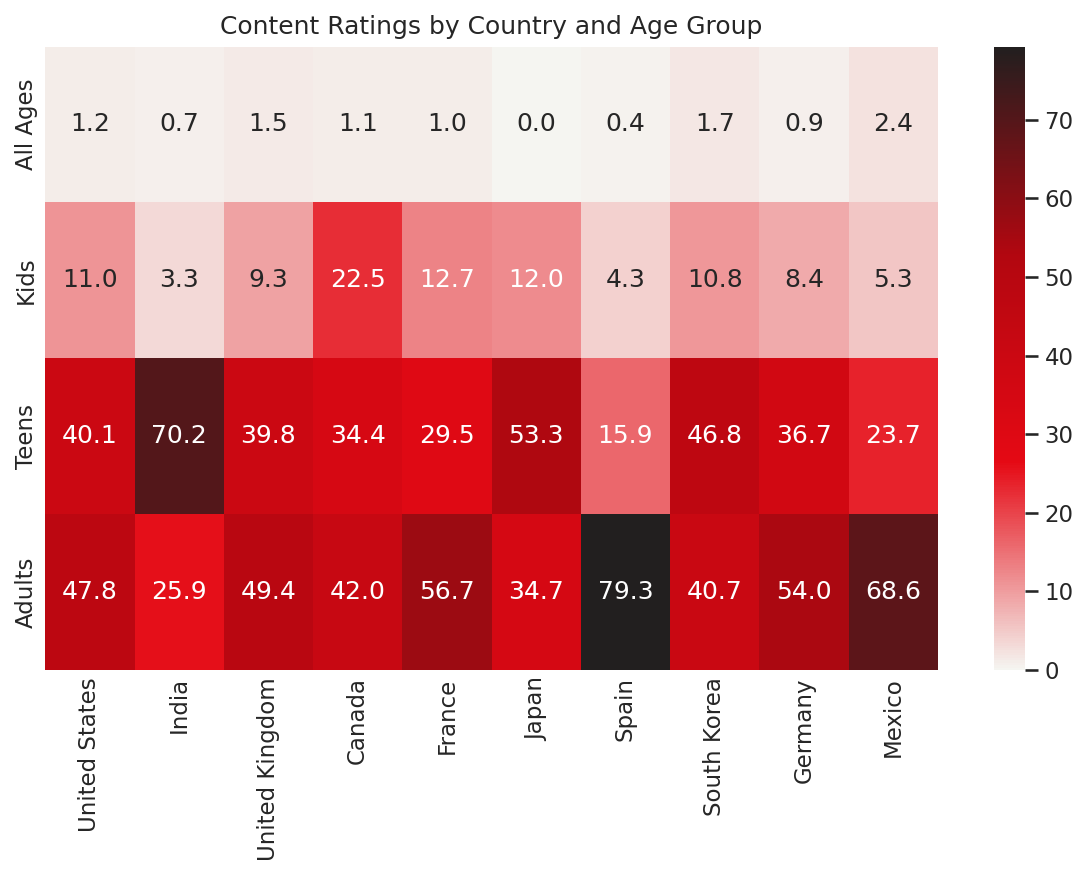

In [44]:
age_by_rating = {
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',
    'G': 'Kids',
    'TV-G': 'Kids',
    'TV-Y7-FV': 'Kids',
    'PG': 'Teens',
    'TV-PG': 'Teens',
    'TV-14': 'Teens',
    'PG-13': 'Teens',
    'R': 'Adults',
    'TV-MA': 'Adults',
    'NC-17': 'Adults',
    'UR': 'Adults',
    'NR': 'All Ages'
}
age_order=['All Ages','Kids','Teens','Adults']
up={'United States':'USA','South Korea':'S. Korea','United Kingdom':'UK'}

aud_a=udf.replace({'rating':age_by_rating})
aa=aud_a[aud_a['country'].isin(topcon)].groupby('country')['rating'].value_counts()
aa=aa.unstack(level='rating')
aa_pt = aa.div(aa.sum(axis=1), axis=0) * 100
aa_pt.fillna(0,inplace=True)

# Creating the heatmap

custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ['#f5f5f1','#e50914','#b20710','#221f1f'])

plt.figure(figsize=(8, 6), dpi=150)
sns.heatmap(aa_pt.T.loc[age_order,topcon], annot=True, cmap=custom_cmap,fmt='.1f')

plt.title('Content Ratings by Country and Age Group')
plt.ylabel('')
plt.xlabel('')
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

>Insights

---
* The United States takes the lead, showcasing its dominant contribution to the platform's content library. Following closely are India and the United Kingdom, displaying their significant presence, emphasizing their role in shaping Netflix's global content offering.
*  India has the highest proportion of Movies, while Mexico, Canada, and the United Kingdom have a relatively balanced distribution between Movies and TV Shows. Germany, France, Spain and the United States lean towards Movies, whereas Japan, and South Korea exhibit a preference for TV Shows.
* But recent trends show that more TV shows are being released by the top countries, emphasizing a shift in audience preferences towards TV shows. This shift may impact Netflix's content offerings.
* The predominant target audience for Netflix content in top countries comprises adults and teenagers

# Genre Analysis

1. Distibution of Netflix Content by Genre
2. Trends in Genre Additions Over the Years

**Distribution of Netflix Content by Genre**

In [45]:
gdf=df.explode('genre').reset_index(drop=True)

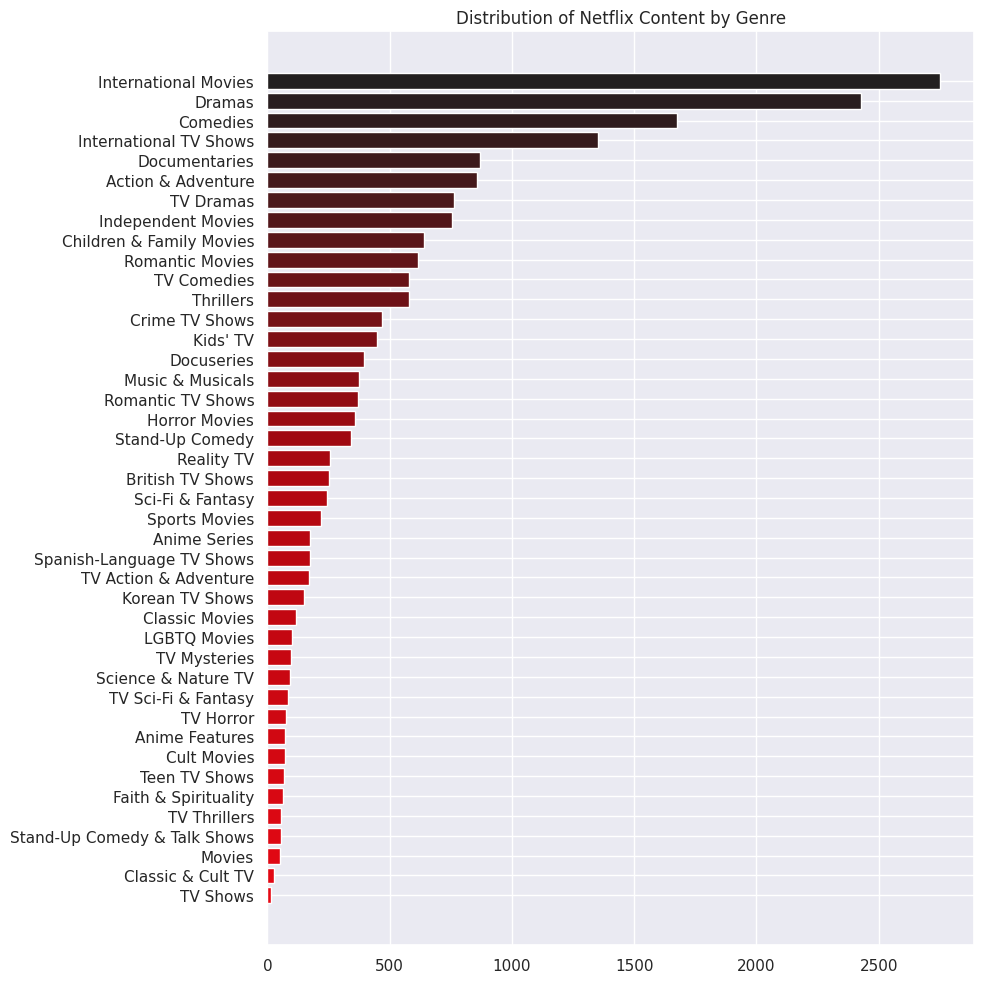

In [46]:
cnt=gdf.groupby('genre').size()
cnt=cnt.sort_values(ascending=False)

cusmap = LinearSegmentedColormap.from_list("cusmap", ['#221f1f','#b20710','#e50914'])
cmap = plt.get_cmap(cusmap, len(cnt))
shades = [cmap(i) for i in np.linspace(0, 1, len(cnt))]
fshades=['#%02X%02X%02X' % (int(r*255), int(g*255), int(b*255)) for r, g, b, _ in shades]

plt.figure(figsize=(10,10), dpi=100)
plt.barh(cnt.index,cnt.values, color=fshades)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Netflix Content by Genre')
plt.gca().invert_yaxis()
plt.tight_layout()

# Display the chart
plt.show()

**Trends in Genre Additions Over the Years**

In [47]:
gydf=gdf[gdf['year_added']>=2011].pivot_table(index='genre',columns='year_added',values='type',aggfunc='count',fill_value=0)

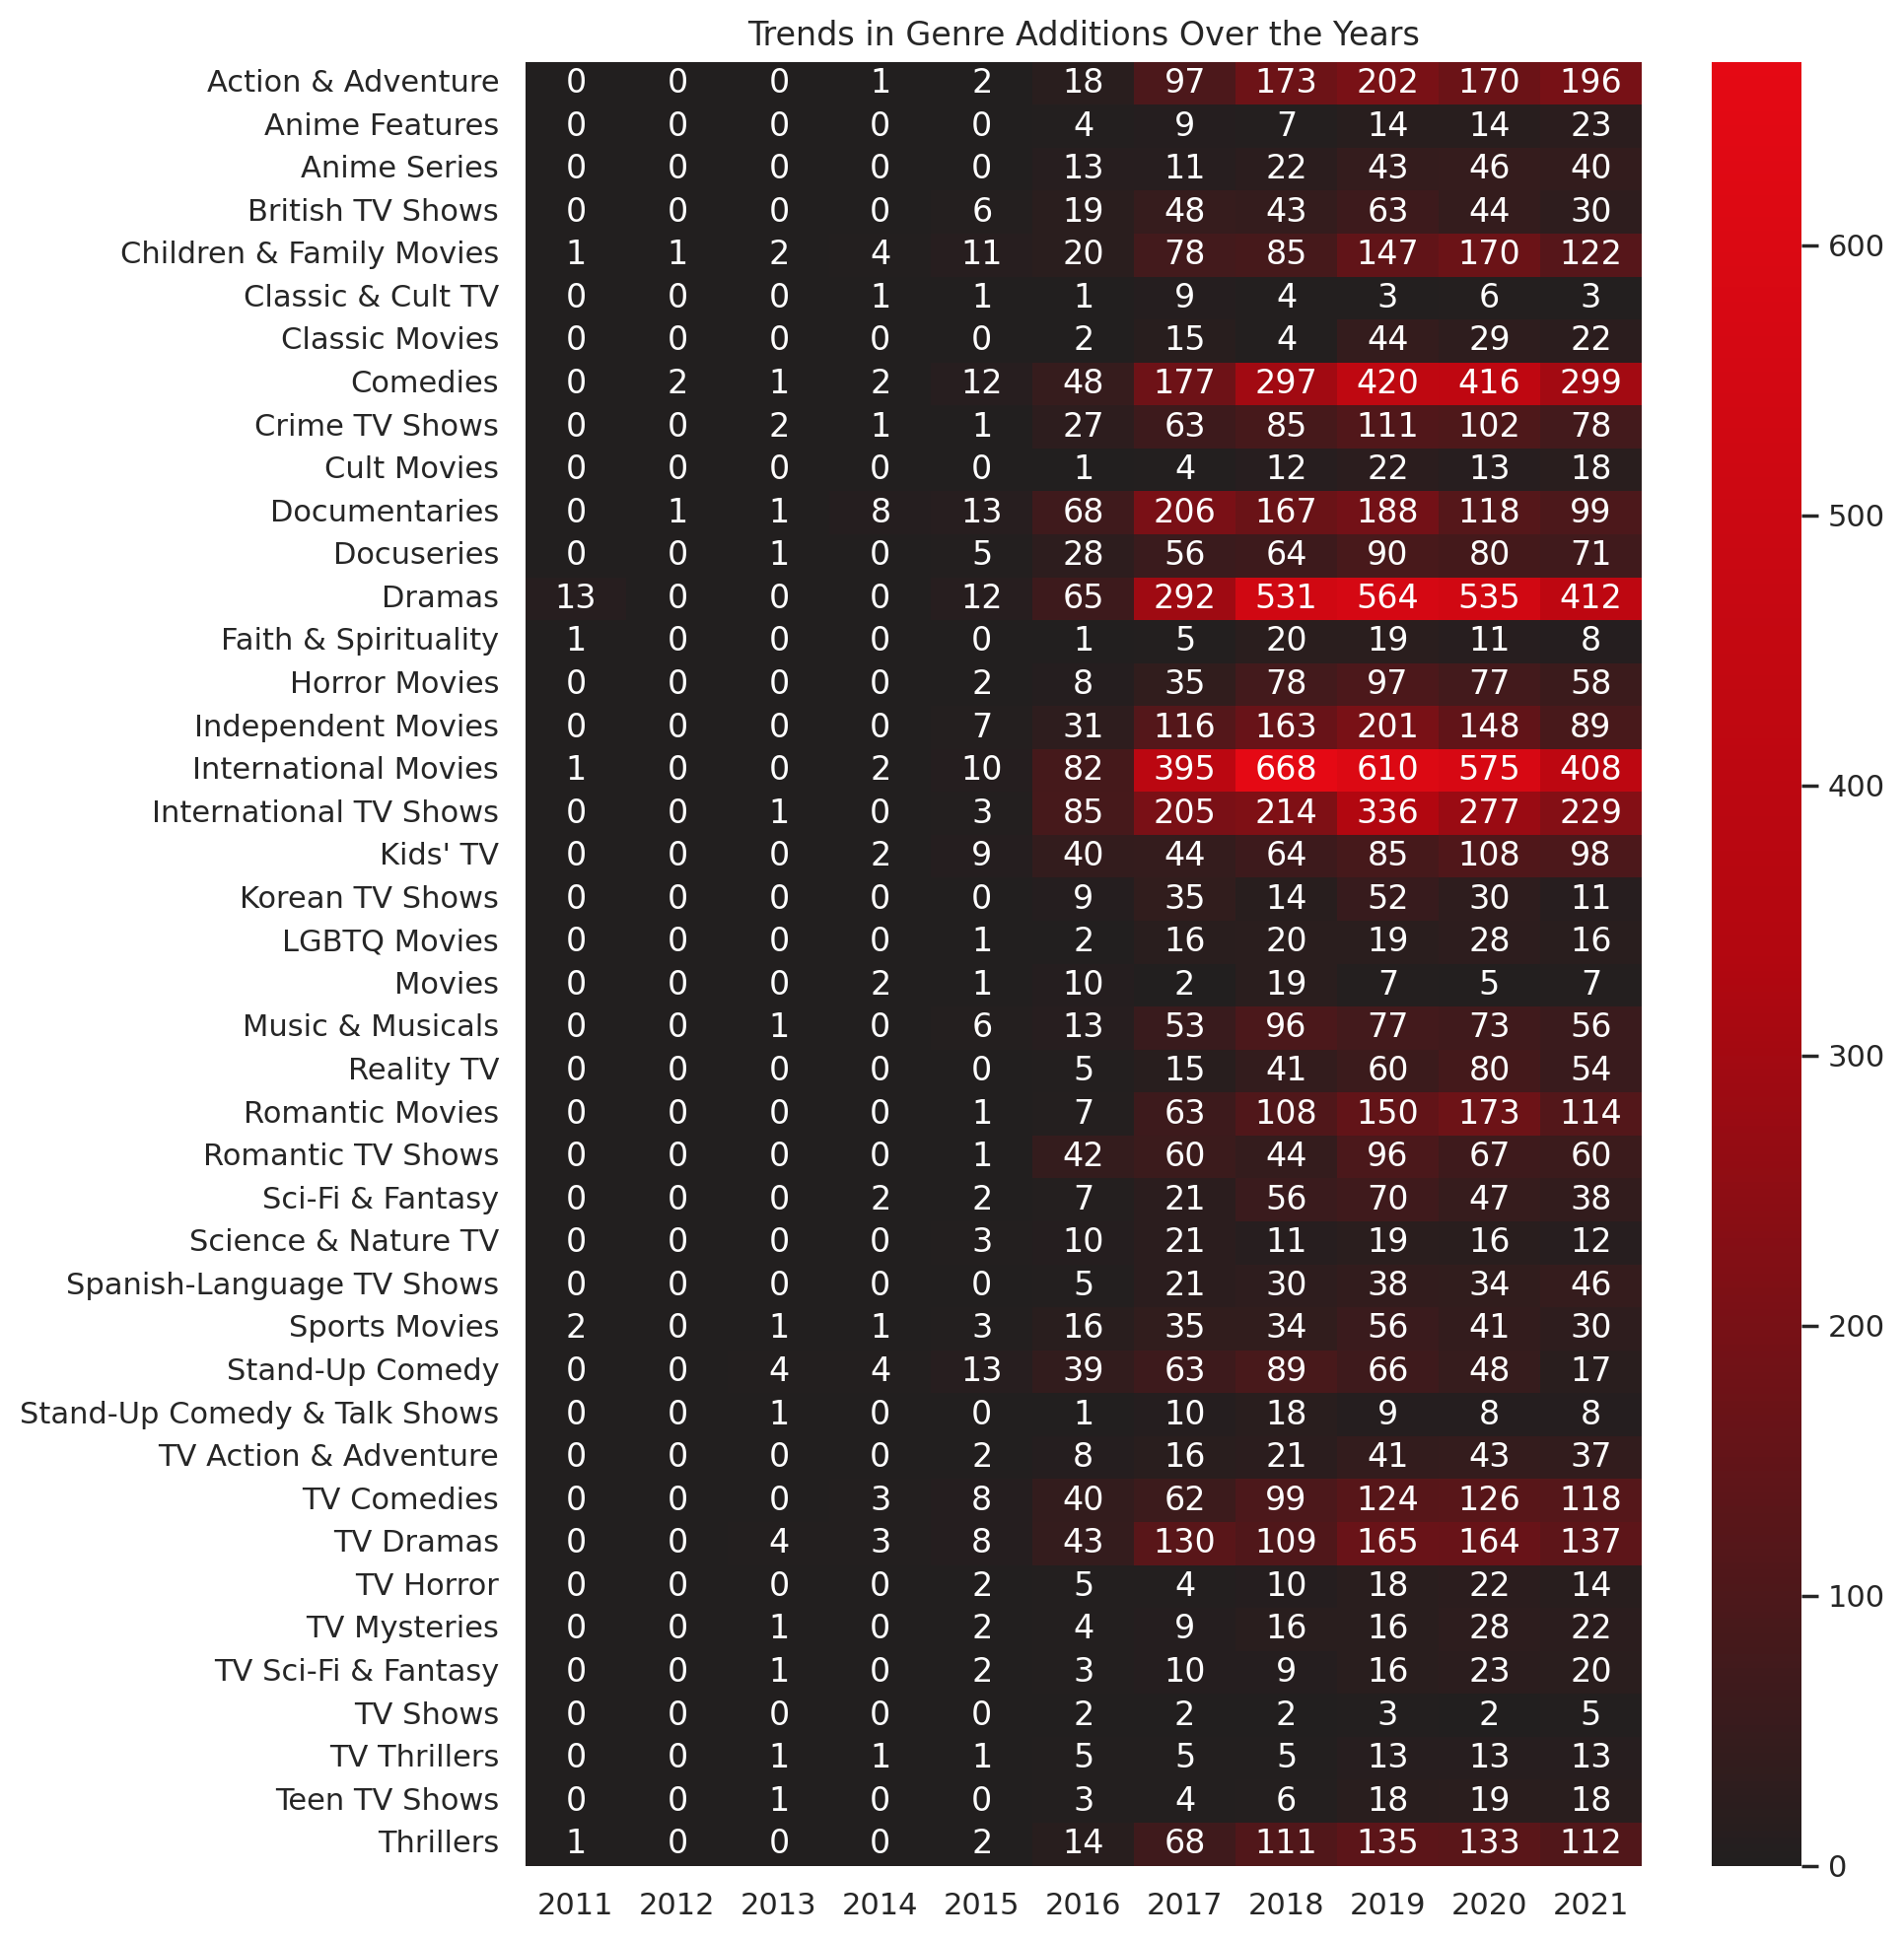

In [48]:
plt.figure(figsize=(10,10),dpi=200)

sns.heatmap(gydf,annot=True,cmap=cusmap,fmt='d')
plt.title('Trends in Genre Additions Over the Years')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

>Insights

---
The most prevalent genres are "International Movies" and "Dramas," with the highest number of additions each year. Additionally, genres like "Comedies," "Action & Adventure," and "TV Dramas" also consistently contribute a significant amount of content. This provides insights into Netflix's content strategy, highlighting the genres that receive the most attention and investment.

# Analysis on Actors

1. Netflix's Top 10 Actors: Movies and TV Shows count
2. Top Actors from the Leading Content-Producing Nations
3. Top 5 Movies and TV Shows Actors

**Netflix's Top 10 Actors: Movies and TV Shows count**

In [49]:
adf=df.explode('actors').reset_index(drop=True)

In [50]:
cnt=adf.groupby('actors').size()
cnt.sort_values(ascending=False,inplace=True)
print(cnt)

actors
Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
                   ... 
Jamie Luk             1
Jamie Lissow          1
Jamie Lever           1
Jamie Lee             1
Ṣọpẹ́ Dìrísù          1
Length: 36429, dtype: int64


In [51]:
#droping Unknown
cnt=cnt.drop(index='Unknown')

In [52]:
top10=cnt.head(10).index.tolist()
fadf = adf[adf['actors'].isin(top10)].copy()


In [53]:
# Pivot the DataFrame while maintaining the desired order
pt = fadf.pivot_table(index='actors', columns='type', aggfunc='size', fill_value=0)
pt=pt.loc[top10]
print(pt)

type              Movie  TV Show
actors                          
Anupam Kher          42        1
Shah Rukh Khan       35        0
Julie Tejwani        28        5
Takahiro Sakurai      7       25
Naseeruddin Shah     32        0
Rupa Bhimani         27        4
Om Puri              30        0
Akshay Kumar         30        0
Yuki Kaji            10       19
Paresh Rawal         28        0


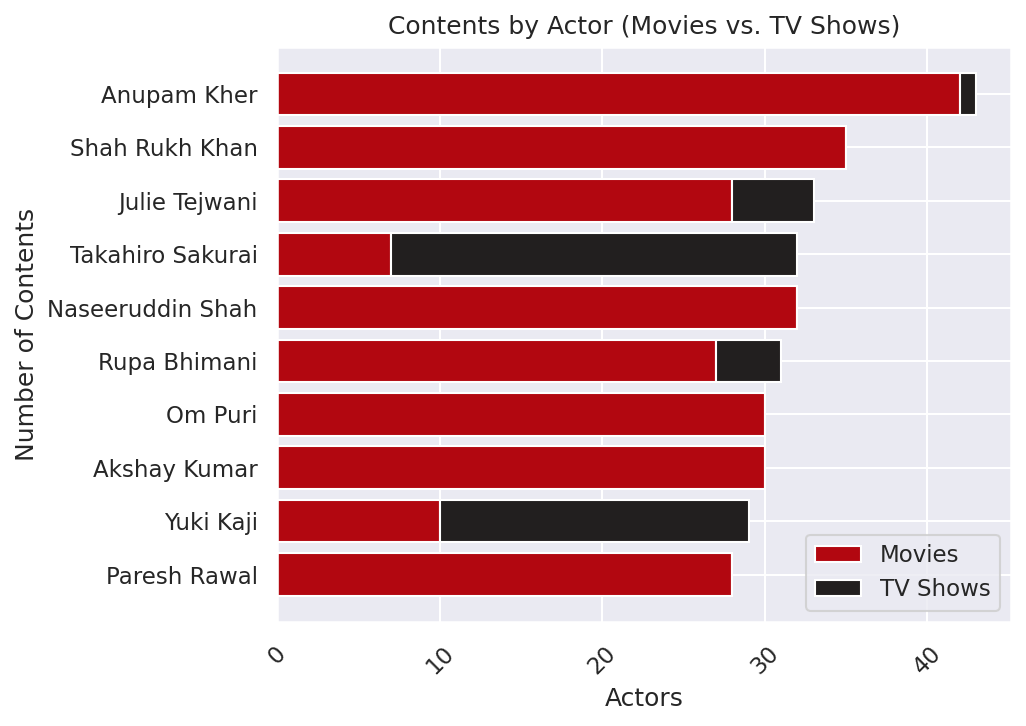

In [54]:

# Create a stacked bar chart
plt.figure(figsize=(7, 5), dpi=150)
plt.barh(pt.index, pt['Movie'], label='Movies', color='#b20710')
plt.barh(pt.index, pt['TV Show'], left=pt['Movie'], label='TV Shows', color='#221f1f')

# Set labels and title
plt.xlabel('Actors')
plt.ylabel('Number of Contents')
plt.title('Contents by Actor (Movies vs. TV Shows)')

# Add a legend
plt.legend()
plt.gca().invert_yaxis()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Top Actors from the Leading Content-Producing Nations**

In [55]:
fadf=udf[udf['country'].isin(topcon)].explode('actors')
fadf= adf[adf['actors']!='Unknown']
actors=fadf.groupby(['country','actors']).size().reset_index(name='count').sort_values(by=['country','count'],ascending=[True,False])

topactors=actors.loc[actors.groupby('country')['count'].idxmax()]
topactors=topactors.set_index('country').loc[topcon]
print(topactors['actors'])

country
United States           Adam Sandler
India                    Anupam Kher
United Kingdom             Eric Idle
Canada            John Paul Tremblay
France                Wille Lindberg
Japan               Takahiro Sakurai
Spain                    Mario Casas
South Korea             Sung Dong-il
Germany                Charly Hübner
Mexico               Arcelia Ramírez
Name: actors, dtype: object


In [56]:
tpact=fadf[fadf['actors'].isin(topactors['actors'])]
tpact=tpact.pivot_table(index='actors',columns='type',values='genre',aggfunc='count',fill_value=0)
print(tpact.loc[topactors['actors']])

type                Movie  TV Show
actors                            
Adam Sandler           20        0
Anupam Kher            42        1
Eric Idle              10        5
John Paul Tremblay     10        5
Wille Lindberg          5        0
Takahiro Sakurai        7       25
Mario Casas             9        2
Sung Dong-il            1        5
Charly Hübner           4        0
Arcelia Ramírez         3        4


**Top 5 Movies and TV Shows Actors**

In [57]:
movact=df[df['type']=='Movie'].explode('actors').reset_index(drop=True)
tvact=df[df['type']=='TV Show'].explode('actors').reset_index(drop=True)

In [58]:
movact=movact[movact['actors']!='Unknown'].groupby('actors').size().reset_index(name='count').sort_values(by='count',ascending=False).set_index('actors')
tvact=tvact[tvact['actors']!='Unknown'].groupby('actors').size().reset_index(name='count').sort_values(by='count',ascending=False).set_index('actors')

In [59]:
top5mact=movact.head()
print(top5mact)

                  count
actors                 
Anupam Kher          42
Shah Rukh Khan       35
Naseeruddin Shah     32
Akshay Kumar         30
Om Puri              30


In [60]:
top5tact=tvact.head()
print(top5tact)

                  count
actors                 
Takahiro Sakurai     25
Yuki Kaji            19
Daisuke Ono          17
Junichi Suwabe       17
Ai Kayano            16


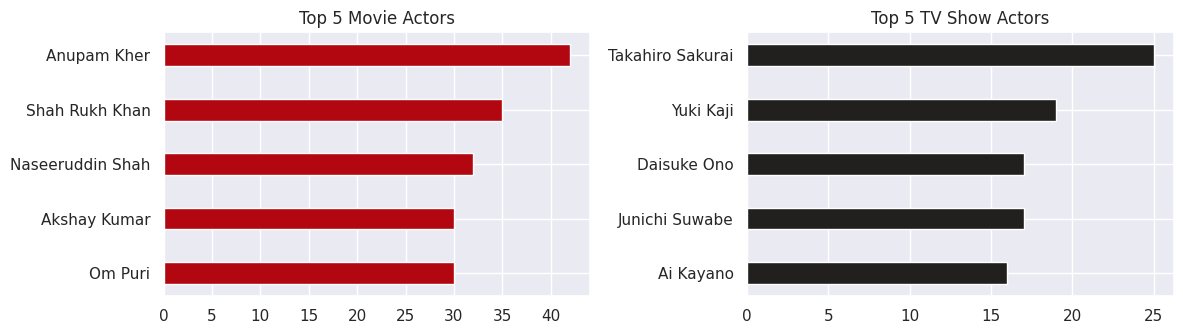

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3.5))
bar_width = 0.4

# Top 5 Movie Actors
ax1.barh(top5mact.index, top5mact['count'], color='#b20710',height=bar_width)
ax1.set_title('Top 5 Movie Actors')
ax1.invert_yaxis()

# Top 5 TV Show Actors
ax2.barh(top5tact.index, top5tact['count'], color='#221f1f',height=bar_width)
ax2.set_title('Top 5 TV Show Actors')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

>Insights

---
* The prominence of Indian actors in Netflix's content catalog reflects the influence of Indian cinema and audience preferences. Additionally, the top actors are primarily engaged in movies rather than TV shows, which aligns with the prevalence of Indian actors in Netflix's offerings. This correlation is reinforced by India's substantial contribution to the platform's movie content
* On Netflix, Indian actors dominate the movie category, while Japanese and South Korean actors excel in the TV show category.

# Analysis of Directors

1. Netflix's Top 10 Director Contributions
2. Rating Analysis of the Top Directors"
3. Top 5 Movie and TV Show Directors Featured on Netflix

**Netflix's Top 10 Director Contributions**

In [62]:
ddf=df.explode('director')
ddf=ddf[ddf['director']!='Unknown'].reset_index(drop=True)

In [63]:
cnt=ddf['director'].value_counts()

In [64]:
top10dir=cnt.head(10).index.tolist()
cddf=ddf.pivot_table(index='director',columns='type',values='show_id',aggfunc='count',fill_value=0)

In [65]:
topdir=cddf.loc[top10dir]
print(topdir)

type                 Movie  TV Show
director                           
Rajiv Chilaka           22        0
Jan Suter               21        0
Raúl Campos             19        0
Suhas Kadav             16        0
Marcus Raboy            15        1
Jay Karas               15        0
Cathy Garcia-Molina     13        0
Martin Scorsese         12        0
Youssef Chahine         12        0
Jay Chapman             12        0


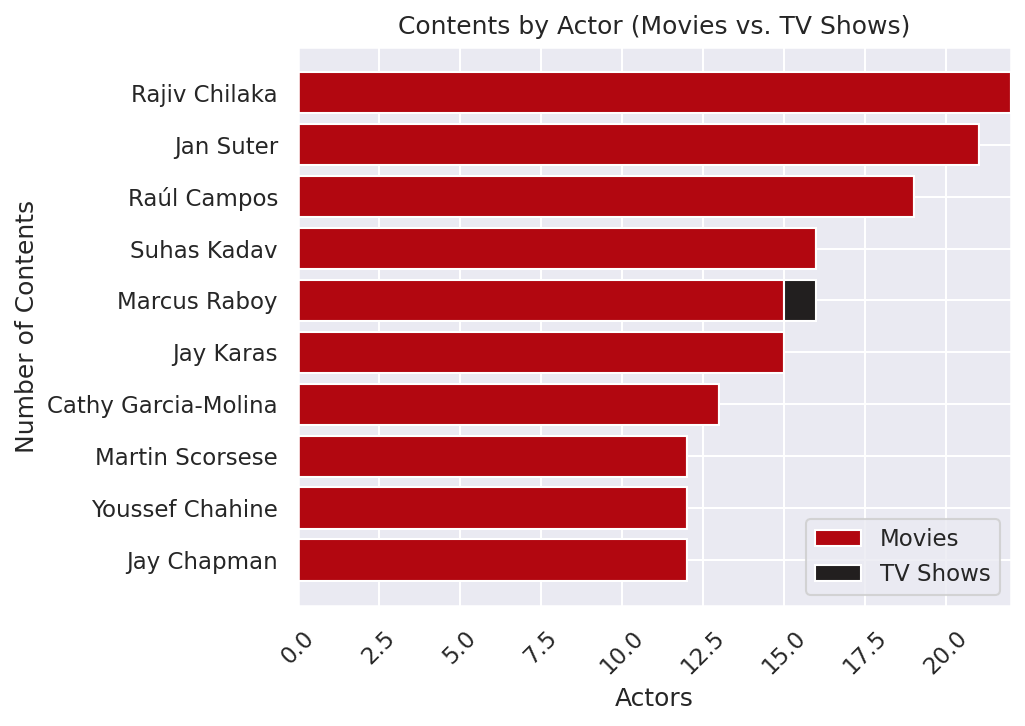

In [66]:

# Create a stacked bar chart
plt.figure(figsize=(7, 5), dpi=150)
plt.barh(topdir.index, topdir['Movie'], label='Movies', color='#b20710')
plt.barh(topdir.index, topdir['TV Show'], left=topdir['Movie'], label='TV Shows', color='#221f1f')

# Set labels and title
plt.xlabel('Actors')
plt.ylabel('Number of Contents')
plt.title('Contents by Actor (Movies vs. TV Shows)')

# Add a legend
plt.legend()
plt.gca().invert_yaxis()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Rating Analysis of the Top Directors"**

In [67]:
drdf=ddf[ddf['director'].isin(topdir.index)]
drdf=drdf.pivot_table(index='director',columns='rating',values='type',aggfunc='count',fill_value=0)
drdf.loc[topdir.index]

rating,NR,PG,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV
director,,,,,,,,,,
Rajiv Chilaka,0,0,0,0,0,0,0,2,20,0
Jan Suter,0,0,0,1,0,20,0,0,0,0
Raúl Campos,0,0,0,1,0,18,0,0,0,0
Suhas Kadav,0,0,0,0,0,0,0,3,12,1
Marcus Raboy,0,0,0,3,0,13,0,0,0,0
Jay Karas,0,0,0,3,1,11,0,0,0,0
Cathy Garcia-Molina,0,0,0,7,2,2,2,0,0,0
Martin Scorsese,0,2,8,0,0,2,0,0,0,0
Youssef Chahine,0,0,0,5,0,7,0,0,0,0


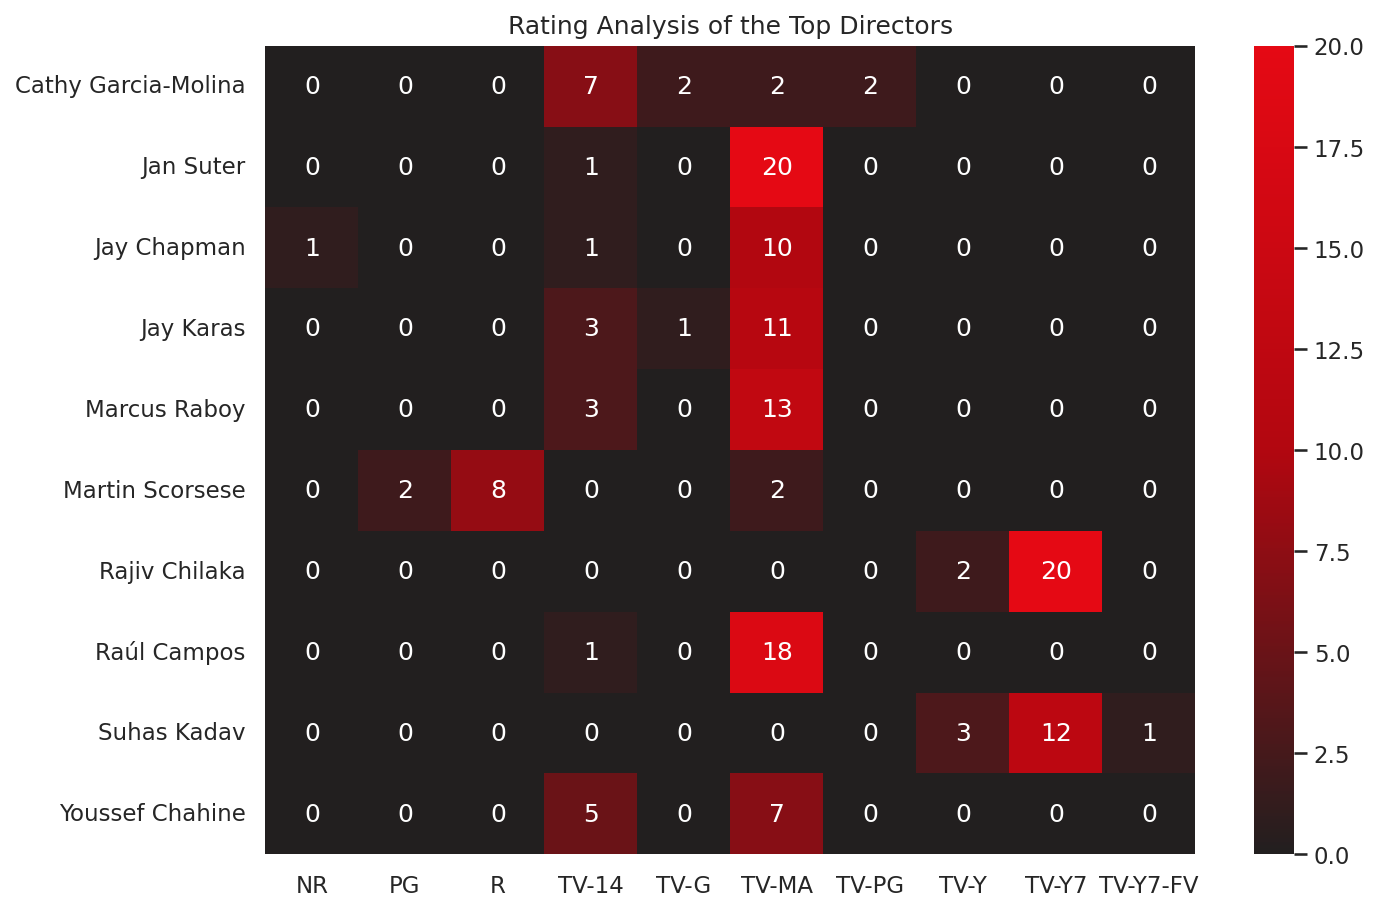

In [68]:
plt.figure(figsize=(10,7),dpi=150)
sns.heatmap(drdf,annot=True,cmap=cusmap,fmt='d')
plt.title('Rating Analysis of the Top Directors')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Top 5 Movie and TV Show Directors Featured on Netflix**

In [69]:
print(cddf.sort_values(by='Movie',ascending=False).head())

type           Movie  TV Show
director                     
Rajiv Chilaka     22        0
Jan Suter         21        0
Raúl Campos       19        0
Suhas Kadav       16        0
Marcus Raboy      15        1


In [70]:
print(cddf.sort_values(by='TV Show',ascending=False).head())

type                 Movie  TV Show
director                           
Ken Burns                2        3
Alastair Fothergill      1        3
Jung-ah Im               0        2
Rob Seidenglanz          0        2
Iginio Straffi           0        2


>Insights:

---

* Directors with the Highest Count of Content on Netflix Are Primarily Associated with Movies
* Top Directors Are Associated with TV-MA and TV-Y7 Ratings on Netflix

# Analysis of TV Shows

1. Analysis of TV Show Durations
2. Genre Analysis for TV Shows
3. Genre vs. Ratings Analysis
4. TV Show Duration vs. Rating Analysis
5. Durations and Leading Actors Analysis for TV Shows

**Analysis of TV Show Durations**

In [71]:
tvdata=df[df['type']=='TV Show'].copy()

In [72]:
scnt = tvdata['duration'].value_counts()

[]

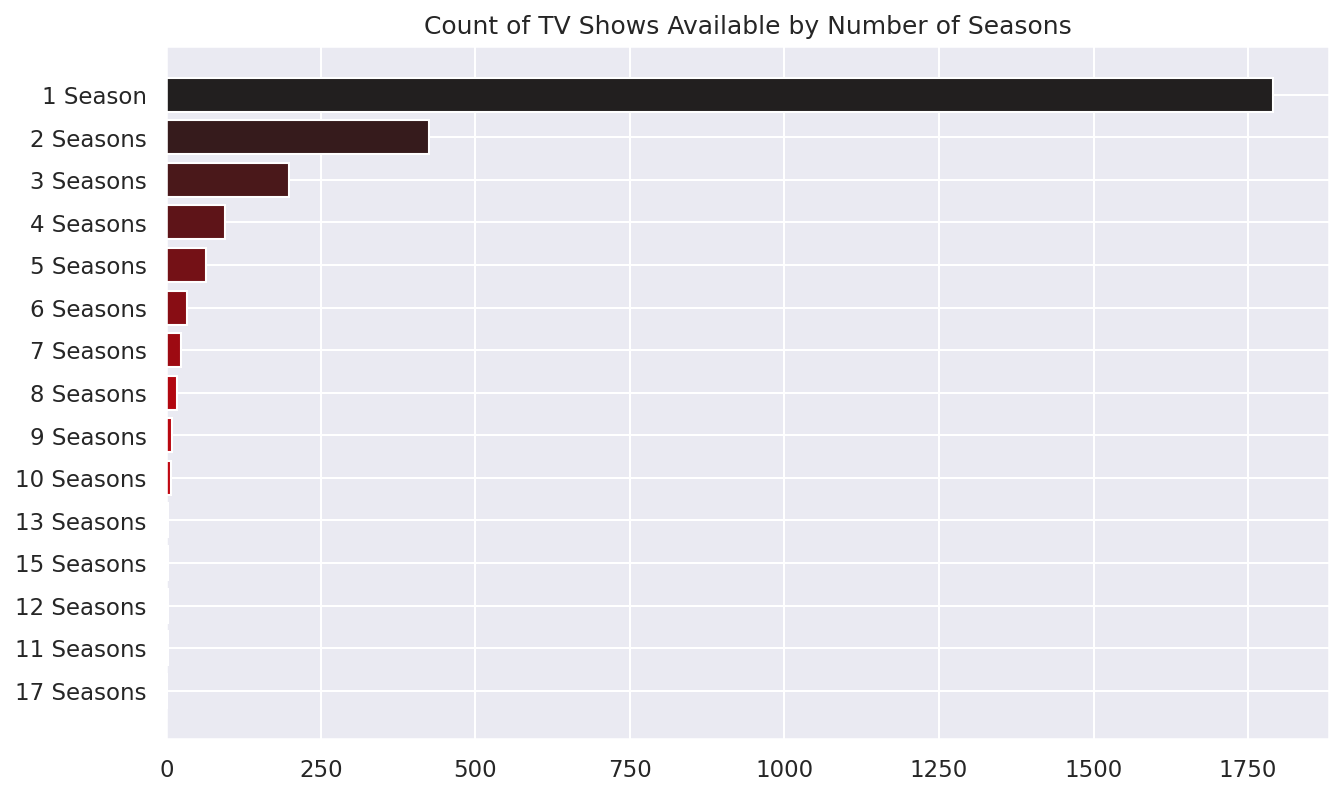

In [73]:
cmap = plt.get_cmap(cusmap, len(scnt))
shades = [cmap(i) for i in np.linspace(0, 1, len(scnt))]
kshades=['#%02X%02X%02X' % (int(r*255), int(g*255), int(b*255)) for r, g, b, _ in shades]

plt.figure(figsize=(10,6),dpi=150)
plt.barh(scnt.index,scnt.values,color=kshades)
plt.title('Count of TV Shows Available by Number of Seasons')
plt.gca().invert_yaxis()
plt.plot()

**Genre Analysis for TV Shows**

In [74]:
gtvdata=tvdata.explode('genre').reset_index(drop=True)
gtv=gtvdata['genre'].value_counts()
print(gtv)

International TV Shows          1350
TV Dramas                        763
TV Comedies                      580
Crime TV Shows                   470
Kids' TV                         450
Docuseries                       395
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 253
Anime Series                     175
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               84
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 28
TV Shows                          16
Name: genre, dtype: int64


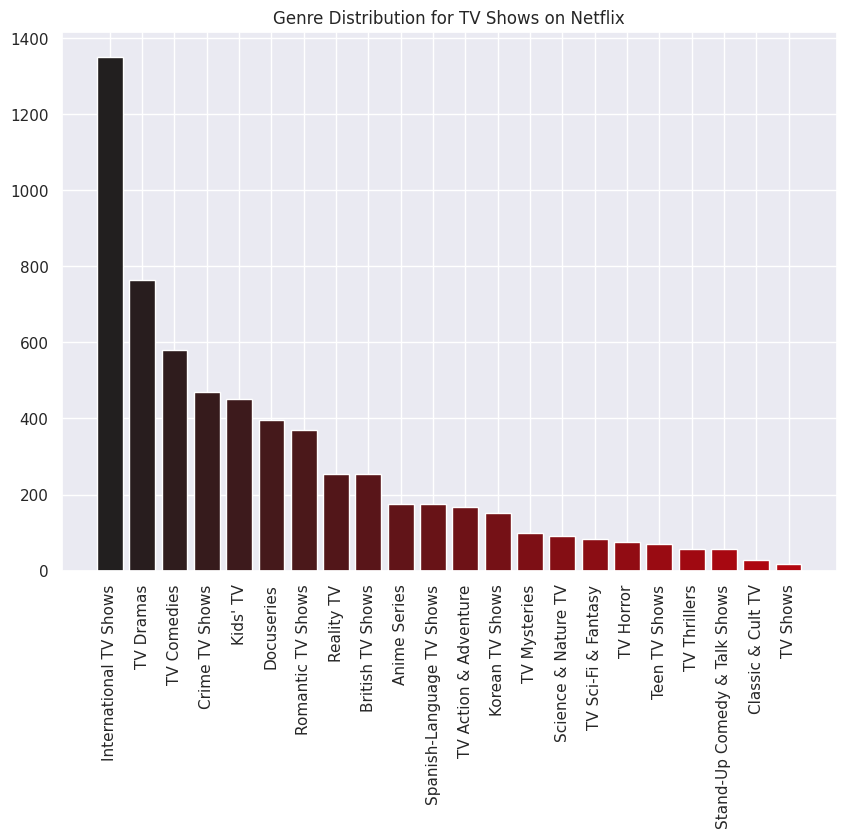

In [75]:
plt.figure(figsize=(10,7),dpi=100)
plt.bar(gtv.index,gtv.values,color=fshades)
plt.title('Genre Distribution for TV Shows on Netflix')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()


**Genre vs. Ratings Analysis**

In [76]:
rtv=gtvdata.pivot_table(index='genre',columns='rating',values='type',aggfunc='count',fill_value=0)
print(rtv)

rating                        NR  R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  TV-Y7  \
genre                                                                         
Anime Series                   0  0     71     0     59     17     2     26   
British TV Shows               2  0     46    17    108     55    20      5   
Classic & Cult TV              0  0     10     1      9      6     1      1   
Crime TV Shows                 1  0    111     1    350      4     0      3   
Docuseries                     1  0     92    24    179     99     0      0   
International TV Shows         2  1    472    24    714    134     0      3   
Kids' TV                       0  0      0    43      0     41   176    189   
Korean TV Shows                0  0     64     2     48     14     9     14   
Reality TV                     0  0     78    22     83     71     0      1   
Romantic TV Shows              2  0    190     2    132     44     0      0   
Science & Nature TV            0  0     21    12    

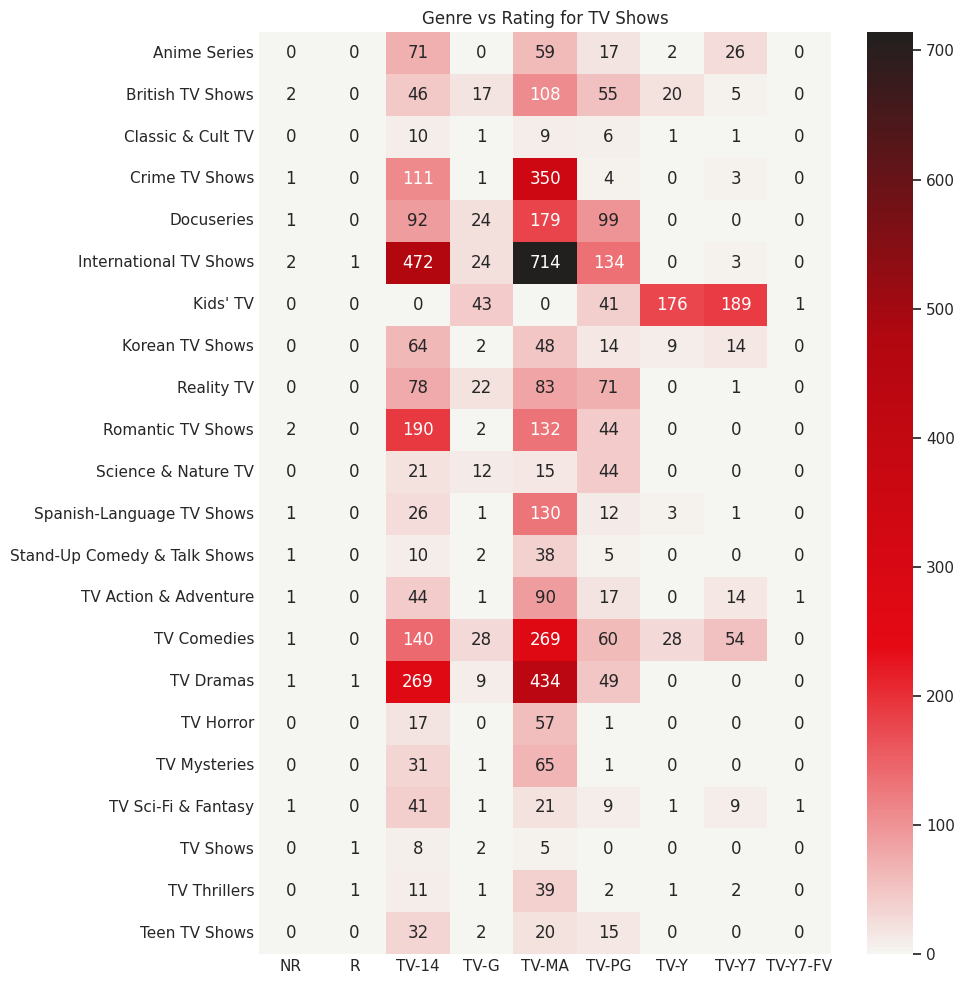

In [77]:
plt.figure(figsize=(10,10), dpi=100)
sns.heatmap(rtv, annot=True, cmap=custom_cmap,fmt='d')

plt.title('Genre vs Rating for TV Shows')
plt.ylabel('')
plt.xlabel('')
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

**TV Show Duration vs. Rating Analysis**

In [78]:
srtv=tvdata.pivot_table(index='duration',columns='rating',values='genre',aggfunc='count',fill_value=0)
srtv=srtv.loc[scnt.index]
print(srtv)

rating      NR  R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  TV-Y7  TV-Y7-FV
1 Season     3  2    534    57    772    239    90     94         0
2 Seasons    0  0     73    15    191     35    54     56         1
3 Seasons    1  0     36    11     95     21    15     20         0
4 Seasons    0  0     27     6     31      7    11     13         0
5 Seasons    0  0     20     2     25      9     3      6         0
6 Seasons    0  0     15     2      9      4     1      2         0
7 Seasons    0  0     13     0      7      3     0      0         0
8 Seasons    0  0      5     1      6      1     1      3         0
9 Seasons    0  0      4     0      4      1     0      0         0
10 Seasons   0  0      1     0      3      1     1      1         0
13 Seasons   1  0      1     0      1      0     0      0         0
15 Seasons   0  0      2     0      0      0     0      0         0
12 Seasons   0  0      1     0      1      0     0      0         0
11 Seasons   0  0      0     0      0      2    

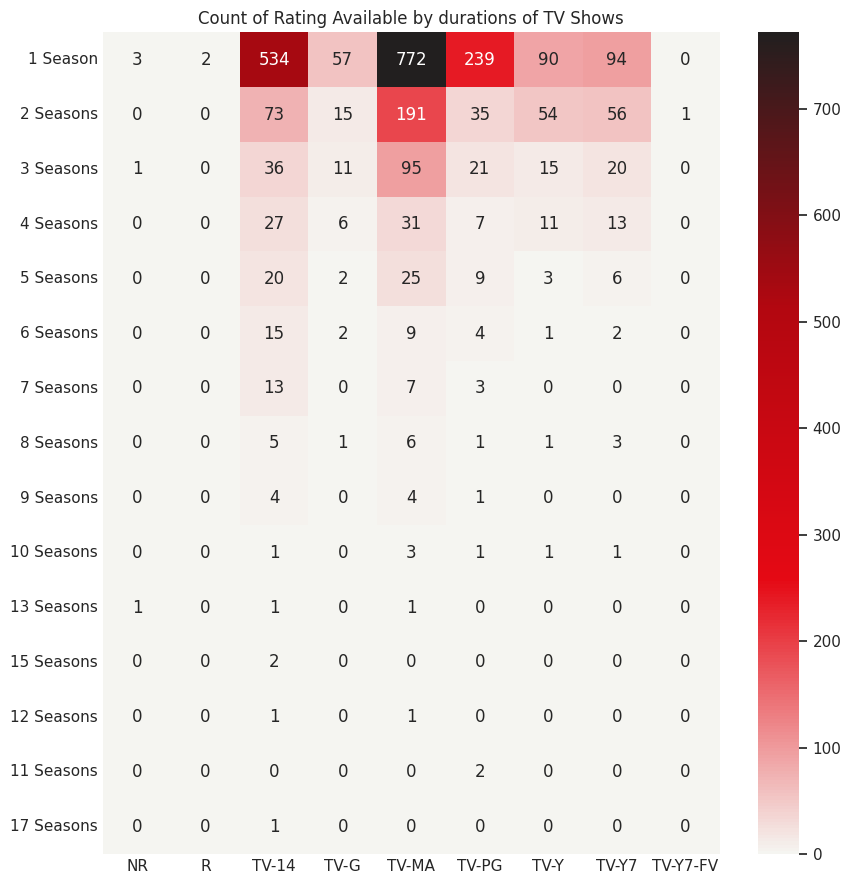

In [79]:
plt.figure(figsize=(9,9), dpi=100)
sns.heatmap(srtv, annot=True, cmap=custom_cmap,fmt='d')

plt.title('Count of Rating Available by durations of TV Shows')
plt.ylabel('')
plt.xlabel('')
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

**Durations and Leading Actors Analysis for TV Shows**

In [80]:
atv=tvdata.explode('actors').reset_index(drop=True)
atv=atv[atv['actors']!='Unknown']
print(atv.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19622 entries, 0 to 19970
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           19622 non-null  object        
 1   type              19622 non-null  object        
 2   title             19622 non-null  object        
 3   director          19622 non-null  object        
 4   country           19622 non-null  object        
 5   date_added        19622 non-null  datetime64[ns]
 6   release_year      19622 non-null  int64         
 7   rating            19622 non-null  object        
 8   duration          19622 non-null  object        
 9   description       19622 non-null  object        
 10  actors            19622 non-null  object        
 11  genre             19622 non-null  object        
 12  month_added       19622 non-null  int64         
 13  month_name_added  19622 non-null  object        
 14  year_added        1962

In [81]:
actv=atv['actors'].value_counts()
print(actv.head())

Takahiro Sakurai    25
Yuki Kaji           19
Daisuke Ono         17
Junichi Suwabe      17
Ai Kayano           16
Name: actors, dtype: int64


In [82]:
top5atv=actv.head().index.tolist()
topatv=atv[atv['actors'].isin(top5atv)].copy()

In [83]:
top_actor_ss=topatv.pivot_table(index='actors',columns='duration',values='type',aggfunc='count',fill_value=0)
print(top_actor_ss)

duration          1 Season  2 Seasons  3 Seasons  5 Seasons
actors                                                     
Ai Kayano               12          3          1          0
Daisuke Ono             11          2          4          0
Junichi Suwabe           9          6          2          0
Takahiro Sakurai        14         10          1          0
Yuki Kaji               12          4          2          1


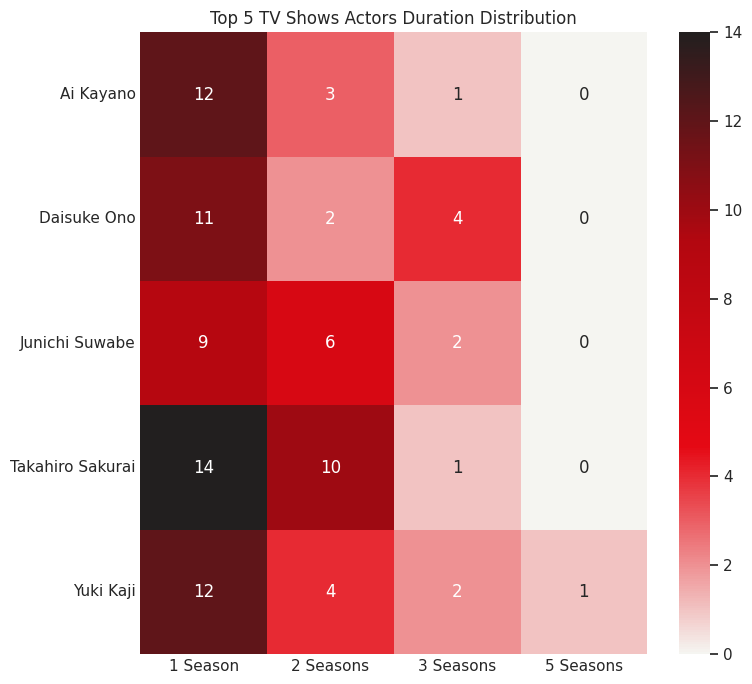

In [84]:
plt.figure(figsize=(8,7),dpi=100)
sns.heatmap(top_actor_ss,annot=True,cmap=custom_cmap,fmt='d')
plt.title('Top 5 TV Shows Actors Duration Distribution')
plt.ylabel('')
plt.xlabel('')
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

>Insights

---
* As trends indicate, TV shows are gaining popularity over time, leading to the creation of more new TV shows. Consequently, TV shows with fewer seasons are surpassing those with longer seasons, highlighting the prevalence of newer content over older TV shows.
* Netflix's strategy of strategically targeting popular genres in new TV shows aligns with their commitment to provide content that resonates with audience preferences. This approach includes adding a significant number of TV-MA, TV-14, and TV-PG content to cater to a broad spectrum of viewer tastes while maximizing their reach across different demographics.
* The increasing opportunity for new actors who haven't previously worked in TV shows is evident through the high number of actors featured in TV shows with fewer seasons. This trend reflects the industry's willingness to explore fresh talent and suggests that newer actors are finding opportunities in television productions, contributing to the diversity of content available to audiences.